<a href="https://colab.research.google.com/github/fatemeh-ict/NLp/blob/main/text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [11]:
df=pd.read_csv('/content/archive(2).zip')

In [12]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


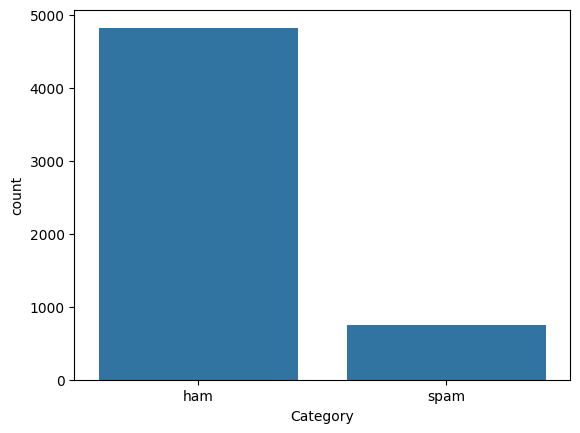

In [13]:
sns.countplot(x=df['Category'])
plt.show()

In [14]:
x=df['Message']
y=df['Category']

In [15]:
print(y)

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
print(y)
print(y.shape)

[0 0 1 ... 0 0 0]
(5572,)


In [17]:
#train & test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=500
tk=Tokenizer(num_words=max_words)
tk.fit_on_texts(x_train)
seq = tk.texts_to_sequences(x_train)  #vectorize

In [24]:
seq

[[137, 10, 46],
 [32, 336, 2, 481, 18, 13, 424],
 [443, 30, 19, 41, 115, 362, 32, 128, 226, 18, 30, 110, 18, 5, 230, 139, 12],
 [141, 129, 3, 313],
 [28, 3, 20, 9, 78, 425, 17, 16, 237, 33],
 [28,
  3,
  70,
  4,
  100,
  180,
  110,
  144,
  33,
  47,
  397,
  2,
  108,
  98,
  47,
  71,
  47,
  96,
  26,
  15],
 [47, 337, 92, 36, 71, 5, 338, 193, 2, 21, 257, 171, 126, 134, 219, 184],
 [12, 186, 8, 293, 13, 110, 23],
 [5,
  43,
  42,
  327,
  20,
  1,
  444,
  4,
  352,
  294,
  5,
  482,
  65,
  12,
  43,
  42,
  7,
  33,
  12,
  43,
  42,
  252,
  157,
  1,
  135],
 [117, 23, 375, 44, 5, 272, 9, 11, 314, 158, 248, 74],
 [7, 410, 33, 21],
 [460, 277, 116, 56, 363, 75, 109, 97, 69],
 [172, 41, 13, 13, 40, 112, 34, 6, 92, 295, 41, 163, 258, 5, 100, 204, 73, 2],
 [141, 1, 273, 68, 20, 2, 3, 194],
 [231, 2, 4, 46, 22, 3, 238, 9, 89, 28, 3, 107],
 [7, 79],
 [305, 15, 10, 46, 3, 32, 5, 306, 4, 286, 16, 483, 10, 2, 153, 3, 78, 4, 328],
 [245,
  245,
  101,
  86,
  14,
  24,
  299,
  19,
  9

In [25]:
from tensorflow.keras.preprocessing.sequence import  pad_sequences
max_len=100
padded_docs=pad_sequences(seq,padding='pre',maxlen=max_len)
print(padded_docs)

[[  0   0   0 ... 137  10  46]
 [  0   0   0 ...  18  13 424]
 [  0   0   0 ... 230 139  12]
 ...
 [  0   0   0 ... 136 208  83]
 [  0   0   0 ...   1  11  89]
 [  0   0   0 ...  87 317 221]]


In [26]:
#create model
from tensorflow.keras.models import Sequential
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding
embedding_vector_feature=30
model=Sequential()
model.add(Embedding(max_words,embedding_vector_feature,input_length=max_len))
model.add(LSTM(256))
model.add(Dense(1,activation='sigmoid'))


In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 30)           15000     
                                                                 
 lstm (LSTM)                 (None, 256)               293888    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 309145 (1.18 MB)
Trainable params: 309145 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.fit(padded_docs,y_train,batch_size=128,epochs=10,validation_split=.2)

Epoch 1/10
28/28 [==============================] - 28s 902ms/step - loss: 0.4673 - accuracy: 0.8353 - val_loss: 0.3622 - val_accuracy: 0.8632
Epoch 2/10
28/28 [==============================] - 21s 761ms/step - loss: 0.2606 - accuracy: 0.8985 - val_loss: 0.1220 - val_accuracy: 0.9630
Epoch 3/10
28/28 [==============================] - 20s 721ms/step - loss: 0.0907 - accuracy: 0.9731 - val_loss: 0.0776 - val_accuracy: 0.9742
Epoch 4/10
28/28 [==============================] - 23s 836ms/step - loss: 0.0591 - accuracy: 0.9818 - val_loss: 0.0777 - val_accuracy: 0.9720
Epoch 5/10
28/28 [==============================] - 21s 761ms/step - loss: 0.0492 - accuracy: 0.9865 - val_loss: 0.0705 - val_accuracy: 0.9720
Epoch 6/10
28/28 [==============================] - 20s 715ms/step - loss: 0.0460 - accuracy: 0.9882 - val_loss: 0.0662 - val_accuracy: 0.9720
Epoch 7/10
28/28 [==============================] - 22s 777ms/step - loss: 0.0353 - accuracy: 0.9905 - val_loss: 0.0660 - val_accuracy: 0.9753

In [34]:
text_seq=tk.texts_to_sequences(x_test)  #vectorize
test_padded=pad_sequences(text_seq,maxlen=max_len)  #padding

In [35]:
accr=model.evaluate(test_padded,y_test)

35/35 [==============================] - 3s 85ms/step - loss: 0.0513 - accuracy: 0.9874


In [36]:
print(accr)

[0.05132580175995827, 0.9874439239501953]
